# Analysis of Suicide in India

##  If you're having suicidal thoughts, please call suicide helpline! 

Suicide helpline numbers - http://www.suicide.org/international-suicide-hotlines.html


This dataset contains data from 2001 -2012.

Source - https://www.kaggle.com/rajanand/suicides-in-india

In [1]:
# import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
# read csv file

df = pd.read_csv('Suicides in India 2001-2012.csv')

df.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237519 entries, 0 to 237518
Data columns (total 7 columns):
State        237519 non-null object
Year         237519 non-null int64
Type_code    237519 non-null object
Type         237519 non-null object
Gender       237519 non-null object
Age_group    237519 non-null object
Total        237519 non-null int64
dtypes: int64(2), object(5)
memory usage: 12.7+ MB


In [4]:
df.duplicated().any()

False

In [5]:
df.sample(10)

,State,Year,Type_code,Type,Gender,Age_group,Total
169759,Odisha,2002,Means_adopted,By Consuming Insecticides,Male,15-29,128
208105,Tamil Nadu,2010,Means_adopted,By Jumping off Moving Vehicles/Trains,Male,15-29,9
101366,Jharkhand,2001,Causes,Divorce,Female,0-14,0
54381,Daman & Diu,2001,Means_adopted,By Jumping off Moving Vehicles/Trains,Female,45-59,0
57378,Daman & Diu,2007,Causes,Drug Abuse/Addiction,Male,0-14,0
44866,Chhattisgarh,2008,Means_adopted,By Fire/Self Immolation,Male,45-59,64
92803,Himachal Pradesh,2009,Professional_Profile,Self-employed (Business activity),Female,15-29,0
137244,Maharashtra,2004,Means_adopted,By Jumping from (Other sites),Male,30-44,7
183398,Punjab,2002,Professional_Profile,Professional Activity,Male,0-14,0
45868,Chhattisgarh,2010,Education_Status,Primary,Male,0-100+,1256


In [6]:
df.Type_code.value_counts()

Causes                  109200
Means_adopted            67200
Professional_Profile     49263
Education_Status          7296
Social_Status             4560
Name: Type_code, dtype: int64

In [7]:
df.Type.value_counts()

Others (Please Specify)                           7263
Farming/Agriculture Activity                      4200
Cancer                                            4200
Drug Abuse/Addiction                              4200
House Wife                                        4200
By touching electric wires                        4200
Student                                           4200
Unemployment                                      4200
By Self Infliction of injury                      4200
Cancellation/Non-Settlement of Marriage           4200
Suspected/Illicit Relation                        4200
Death of Dear Person                              4200
Property Dispute                                  4200
By Overdose of sleeping pills                     4200
By Fire/Self Immolation                           4200
Service (Government)                              4200
Insanity/Mental Illness                           4200
Illness (Aids/STD)                                4200
Public Sec

In [8]:
len(df[df['Total'] == 0])

135481

In [9]:
df.State.value_counts()

Madhya Pradesh       6792
Karnataka            6792
Maharashtra          6792
Odisha               6791
Rajasthan            6791
Andhra Pradesh       6791
Bihar                6790
Chhattisgarh         6790
Haryana              6790
Kerala               6788
Uttar Pradesh        6787
Tamil Nadu           6786
Gujarat              6786
Assam                6786
Jharkhand            6785
Tripura              6782
Delhi (Ut)           6782
West Bengal          6780
Punjab               6779
Himachal Pradesh     6774
Jammu & Kashmir      6761
Goa                  6759
Uttarakhand          6758
Sikkim               6742
Mizoram              6737
Meghalaya            6733
Puducherry           6730
Chandigarh           6717
A & N Islands        6712
Daman & Diu          6710
Arunachal Pradesh    6707
Nagaland             6705
D & N Haveli         6704
Manipur              6700
Lakshadweep          6674
Total (All India)     312
Total (Uts)           312
Total (States)        312
Name: State,

In [10]:
df.Age_group.value_counts()

15-29     45223
30-44     45193
45-59     45146
60+       45074
0-14      45027
0-100+    11856
Name: Age_group, dtype: int64

### Data Wrangling

<ul>
    <li> Rename State and Type like 'A & N Islands', 'A & N Islands (Ut)' </li>     
<li> Drop rows whose total is zero</li>
<li> Drop rows where state is "Total %"</li>    
</ul>    

In [11]:
# rename states

df.replace('A & N Islands (Ut)', 'A & N Islands', inplace=True)
df.replace('Chandigarh (Ut)', 'Chandigarh', inplace=True)
df.replace('D & N Haveli (Ut)', 'D & N Haveli', inplace=True)
df.replace('Daman & Diu (Ut)', 'Daman & Diu', inplace=True)
df.replace('Lakshadweep (Ut)', 'Lakshadweep', inplace=True)
df.replace('Delhi (Ut)', 'Delhi', inplace=True)

In [12]:
# rename Type

df.replace('Bankruptcy or Sudden change in Economic', 
           'Bankruptcy or Sudden change in Economic Status', inplace=True)
df.replace('By Other means (please specify)', 'By Other means', inplace=True)
df.replace('Not having Children(Barrenness/Impotency',
           'Not having Children (Barrenness/Impotency', inplace=True)

In [13]:
# Drop rows where total is zero.

df = df.drop(df[df.Total==0].index)

In [14]:
df[df['Total']==0]

,State,Year,Type_code,Type,Gender,Age_group,Total


In [15]:
df = df.drop(df[(df.State == 'Total (Uts)') | (df.State == 'Total (All India)') | 
               (df.State == 'Total (States)')].index)

In [16]:
df.State.value_counts()

Andhra Pradesh       5185
Karnataka            5115
Tamil Nadu           5054
Madhya Pradesh       5029
Maharashtra          4958
Uttar Pradesh        4954
Gujarat              4856
West Bengal          4596
Kerala               4509
Chhattisgarh         4368
Rajasthan            4324
Odisha               4179
Assam                3868
Haryana              3826
Delhi                3324
Jharkhand            3210
Bihar                3119
Punjab               2960
Himachal Pradesh     2650
Tripura              2451
Uttarakhand          2442
Goa                  2237
Jammu & Kashmir      2159
Puducherry           2124
Sikkim               1421
A & N Islands        1299
Meghalaya            1180
Chandigarh           1092
Arunachal Pradesh    1062
D & N Haveli          952
Mizoram               786
Manipur               609
Nagaland              587
Daman & Diu           579
Lakshadweep            46
Name: State, dtype: int64

### EDA

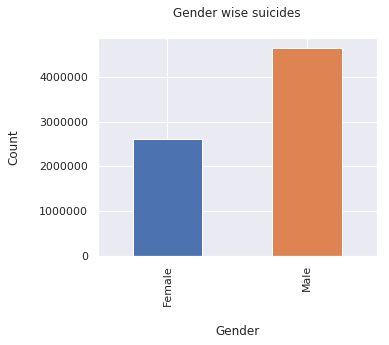

In [17]:
#Gender Suicide Frequency
gender = df.groupby('Gender').sum()['Total'].plot("bar", figsize=(5,4), title ="Gender wise suicides\n");
gender.set_xlabel('\nGender')
gender.set_ylabel('Count\n')
sns.set_style('whitegrid')
sns.cubehelix_palette(8);

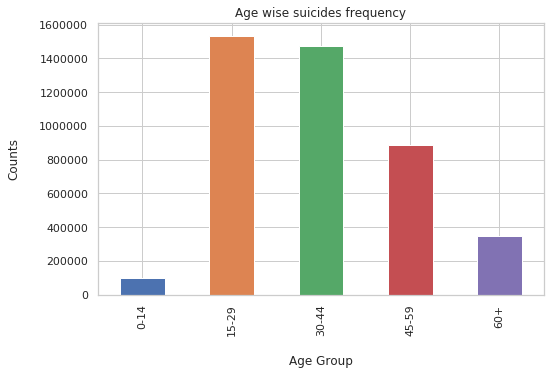

In [18]:
# Age Suicide Frequency
df_Age = df[df['Age_group']!='0-100+']

age = df_Age.groupby('Age_group').sum()['Total'].plot("bar",figsize=(8,5), title ="Age wise suicides frequency");
age.set_xlabel('\nAge Group')
age.set_ylabel('Counts\n')
sns.set_style('whitegrid')
sns.set_palette('Set2');


Middle Age group i.e between 15-44 have the highest number but, It' scary that even kids between age of 0 - 14 also commit suicide.

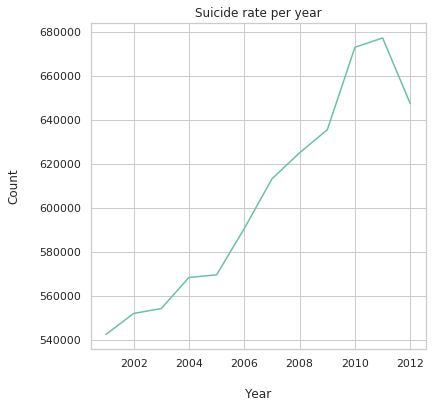

In [19]:
# Suicide rate every year

year = df.groupby('Year').sum()['Total'].plot('line', figsize=(6,6), title = 'Suicide rate per year');
year.set_xlabel('\nYear')
year.set_ylabel('Count\n')
sns.set_style('whitegrid');

Suicide rate is sky rocketting from 2002 till almost 2010 but, it has droped from then.

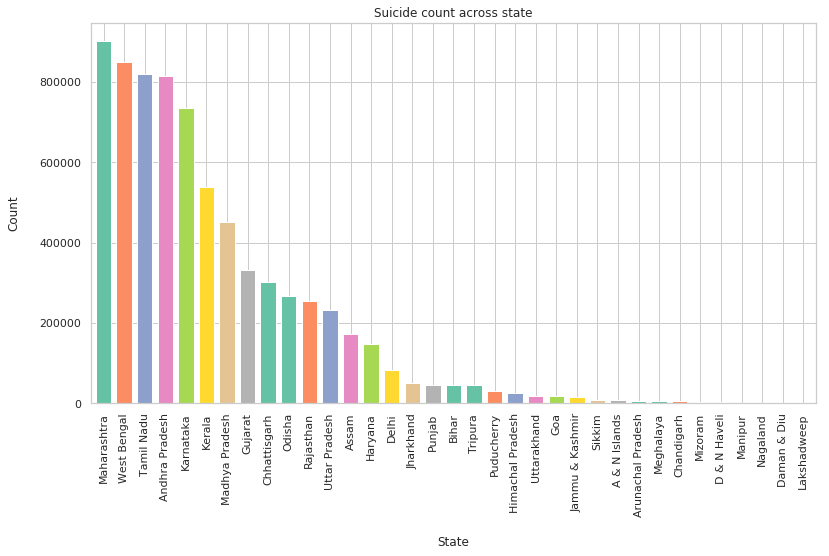

In [20]:
state = df.groupby('State').sum()['Total']
sort_state = state.sort_values(ascending = False)

state_fig = sort_state.plot('bar', figsize = (13,7), title = 'Suicide count across state', width = 0.75)
state_fig.set_xlabel('\nState')
state_fig.set_ylabel('Count\n')
sns.set_style('whitegrid')
sns.set_palette('Set2');

Maharashtra, West Bengal and Tamil Nadu have the highest rate of suicide.

In [21]:
cause = df[df['Type_code'] == 'Causes']
edu_status = df[df['Type_code'] == 'Education_Status']
means_adpt = df[df['Type_code'] == 'Means_adopted']
prof = df[df['Type_code'] == 'Professional_Profile']
soc_status = df[df['Type_code'] == 'Social_Status']

In [22]:
# function to plot

def plot_type(df, Title, X_lab):
    p_type = df.groupby('Type').sum()['Total']
    sort_df = p_type.sort_values(ascending = False)

    fig = sort_df.plot('bar', figsize = (10,6), title = Title, width = 0.75)
    fig.set_xlabel(X_lab + '\n')
    fig.set_ylabel('Count')
    sns.set_style('whitegrid')
    sns.set_palette('Set2');   

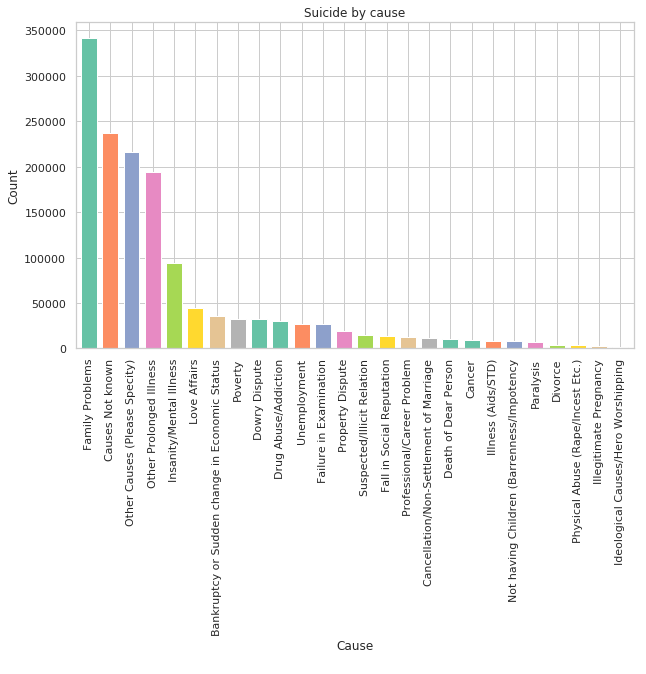

In [23]:
# plot by cause
plot_type(cause, 'Suicide by cause', 'Cause')



Most of the cause are unknown but Family problems and Prolonged illness is at the top.


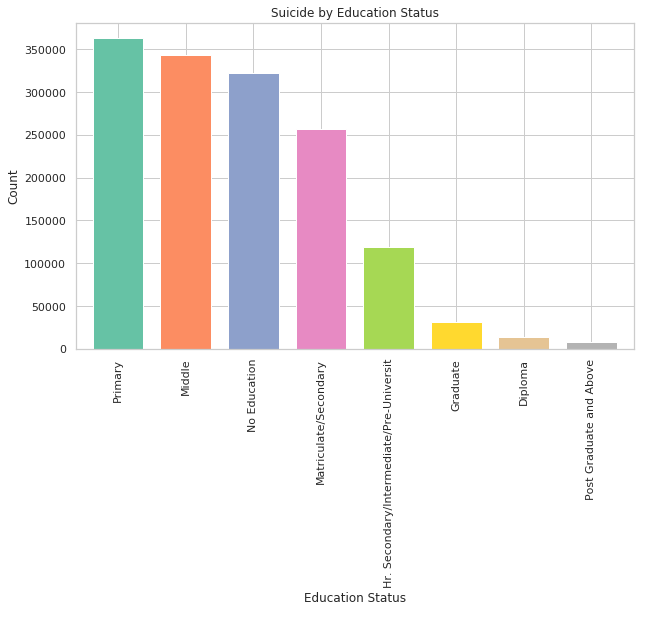

In [24]:
# plot by education status
plot_type(edu_status, 'Suicide by Education Status', 'Education Status')



People with primary or no education are high in number.


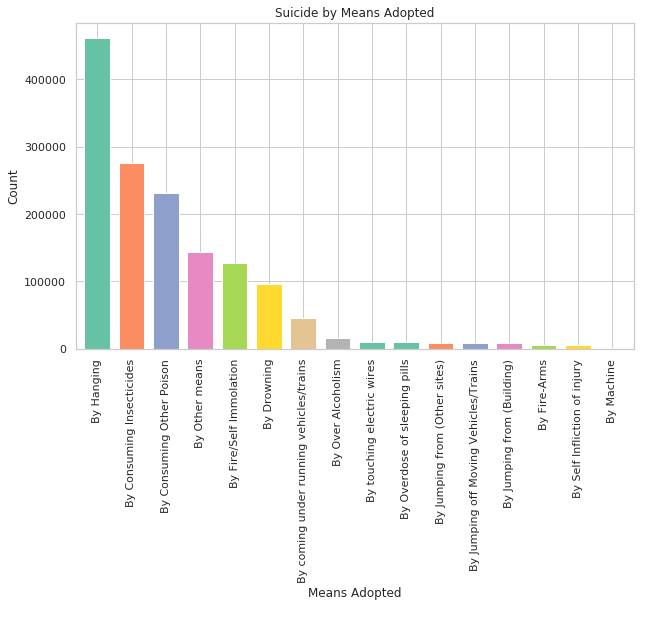

In [25]:
# plot by means adopted
plot_type(means_adpt, 'Suicide by Means Adopted', 'Means Adopted')

Hanging, Consuming Insecticides is more common but, most of other means are unknown.

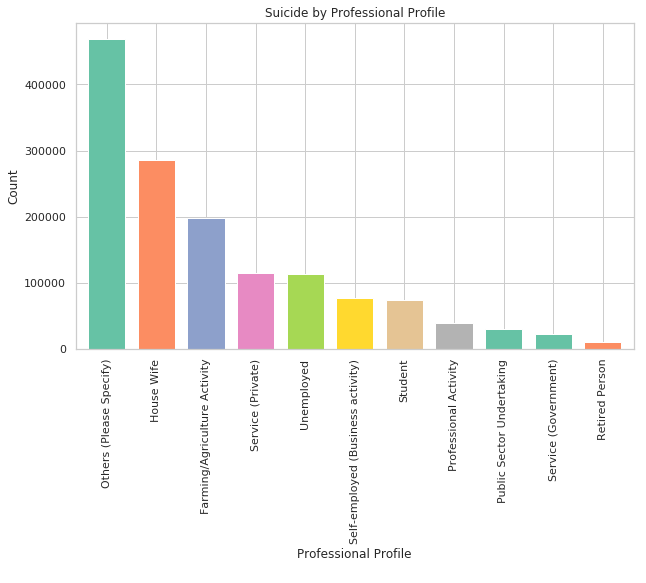

In [26]:
# suicide by professional profile
plot_type(prof, 'Suicide by Professional Profile', 'Professional Profile')

Most of the professional profile is unknown but house wife comes in second.

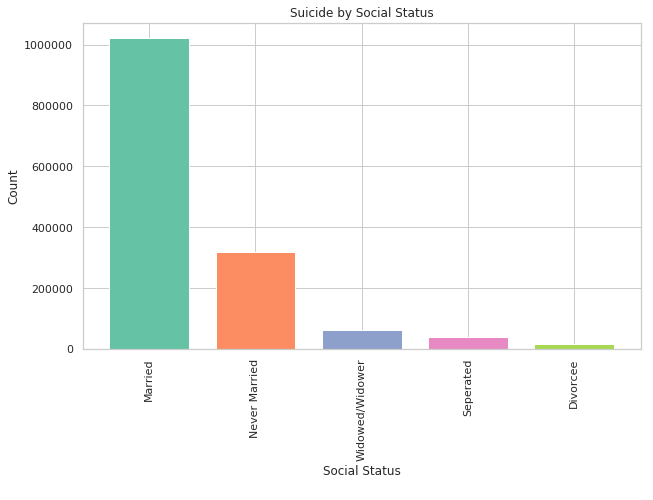

In [27]:
# suicide by social Status
plot_type(soc_status, 'Suicide by Social Status', 'Social Status',)

Family Problems, House Wife and now Married these are at the top when it comes to the cause, professional profile and social status respectively.

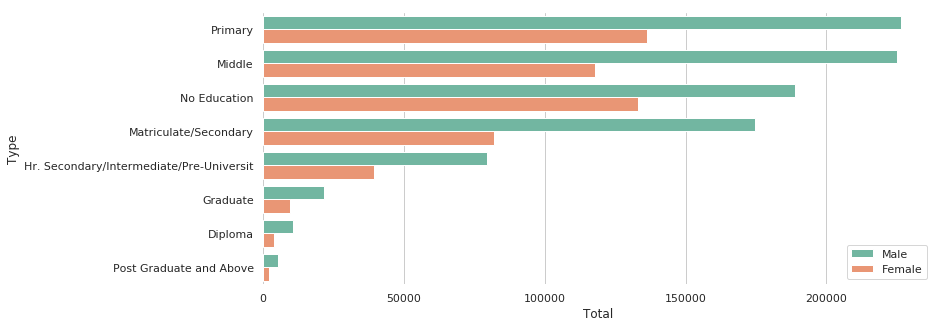

In [28]:
# Education Status by gender
plt.figure(figsize=(12,5))
edu_gen = edu_status.groupby(['Type','Gender'],as_index=False).sum().sort_values('Total',ascending=False)
fig = sns.barplot(x = 'Total', y ='Type',hue='Gender', data = edu_gen)
sns.despine(left=True, bottom=True)
sns.set_style('whitegrid')
plt.legend(loc='lower right');

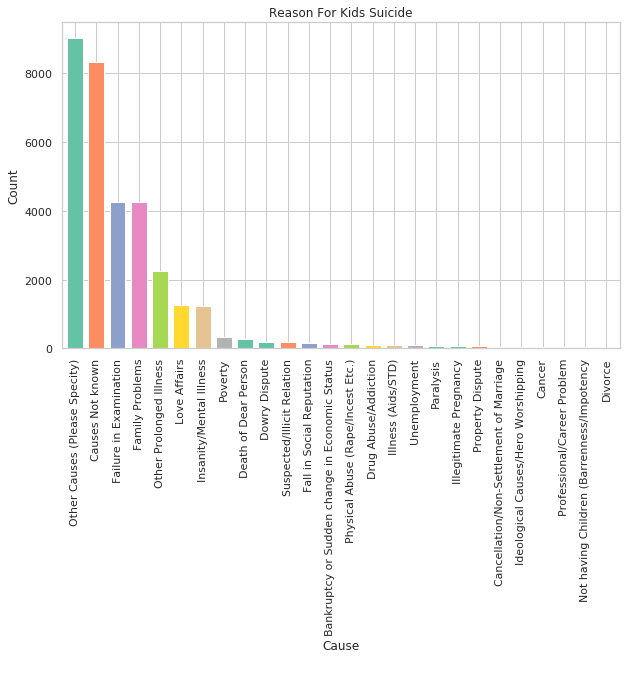

In [29]:
age_lower = df[df['Age_group']== '0-14']
age_lower_cause = age_lower[age_lower['Type_code'] == 'Causes']
plot_type(age_lower_cause, 'Reason For Kids Suicide', 'Cause')

Most of cause is unknown but, Failure in Examination is at the top.

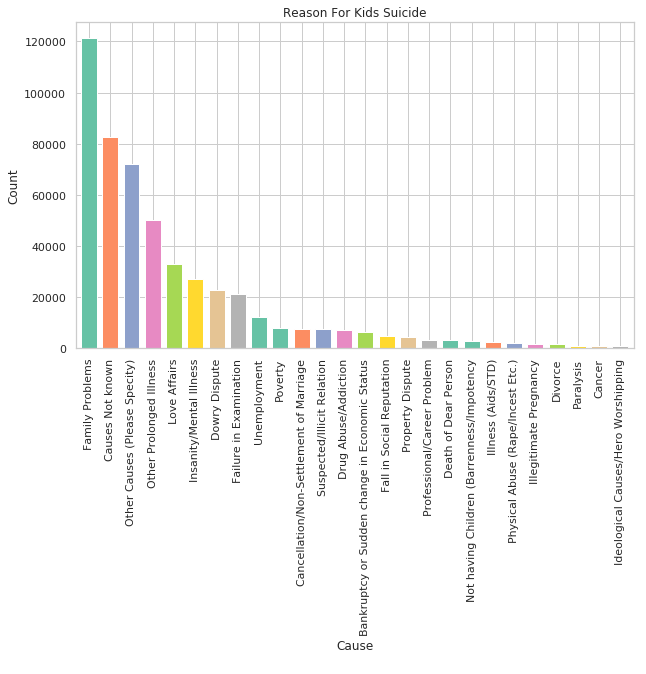

In [30]:
age_middle = df[df['Age_group']== '15-29']
age_middle_cause = age_middle[age_middle['Type_code'] == 'Causes']
plot_type(age_middle_cause, 'Reason For Kids Suicide', 'Cause')

Family Problems, Illness and Love affairs are at the top while, most of the reasons are unknown yet.

## Conclusion

<ul>
    <li>Age group between 15-44 has the highest number of suicides.</li>
    <li>Rate of suicide sky rocketed from 2002-2010 but since 2011 it has been decreasing but, since we have the data till 2012 we can't confim the pattern.</li>
    <li>Maharashtra, West Bengal and Tamil Nadu have the highest suicide rate this might also be because of the high population in these states.</li>
    <li>Family Problems, Illness, Mental Illness are some of the main reason while most of the reasons are still unknown.</li>
    <li>Hanging, Consuming Insecticides is more common but, most of other means are unknown.</li>
    <li>Most of the professional profile is unknown but house wife comes in second, while Farming comes in at third.</li>
    <li>Married is at the top when it comes to social status while never married is at second.</li>
    <li>The reason for suicide at the age group between 0-14 is because of Failure in Examination.</li>
    <li>The reason for suicide at the age group between 15-29 is because of Family Problems. </li>
<ul>